Let's analyze coffee price. We consider climate of Brazil to predict price.

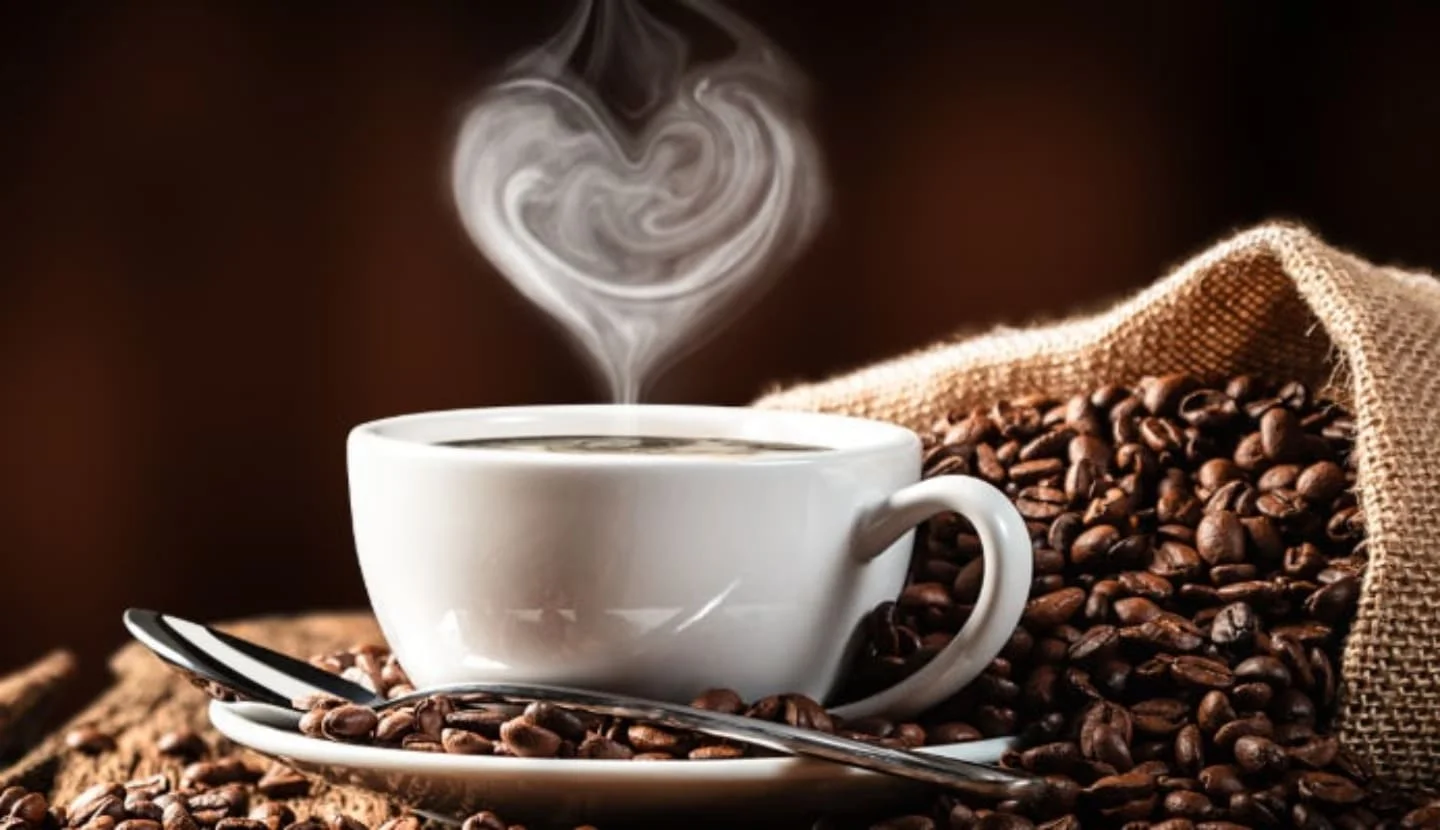

Import libraries

In [1]:
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch.nn as nn

import random
import torch

def set_random_seed(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)
    torch.backends.cudnn.deterministic = True

set_random_seed(42)

In [2]:
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 641.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.3/117.3 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 86.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 13.6 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.5-cp310-cp310-linux_x86_64.whl size=727811 sha256=88da790211805b8c1bd478512cb28a8da40875d8f58ab27ffff96807a812b3c6
  Stored in directory: /root/.cache/pip/wheels/06/80/9b/98db0d58349a2f5c09f8406789ade4270762f97b7d26f2fa22
Successfully built peewee


Import yfinance

In [3]:
# To fetch financial data
import yfinance as yf

Choose the periods and check the data

In [4]:
period = '10y'
interval = '1d'

In [5]:
forex_data = yf.download('KC=F', period=period, interval=interval)

# Set the index to a datetime object
forex_data.index = pd.to_datetime(forex_data.index)

# Display the last five rows
forex_data.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-05-14,199.250000,199.250000,199.000000,202.850006,202.850006,2
2024-05-15,202.300003,202.300003,202.300003,201.250000,201.250000,1
2024-05-16,199.550003,199.550003,199.550003,199.550003,199.550003,4
2024-05-17,208.149994,208.149994,208.149994,208.149994,208.149994,4
2024-05-20,205.899994,207.949997,203.649994,205.500000,205.500000,11742


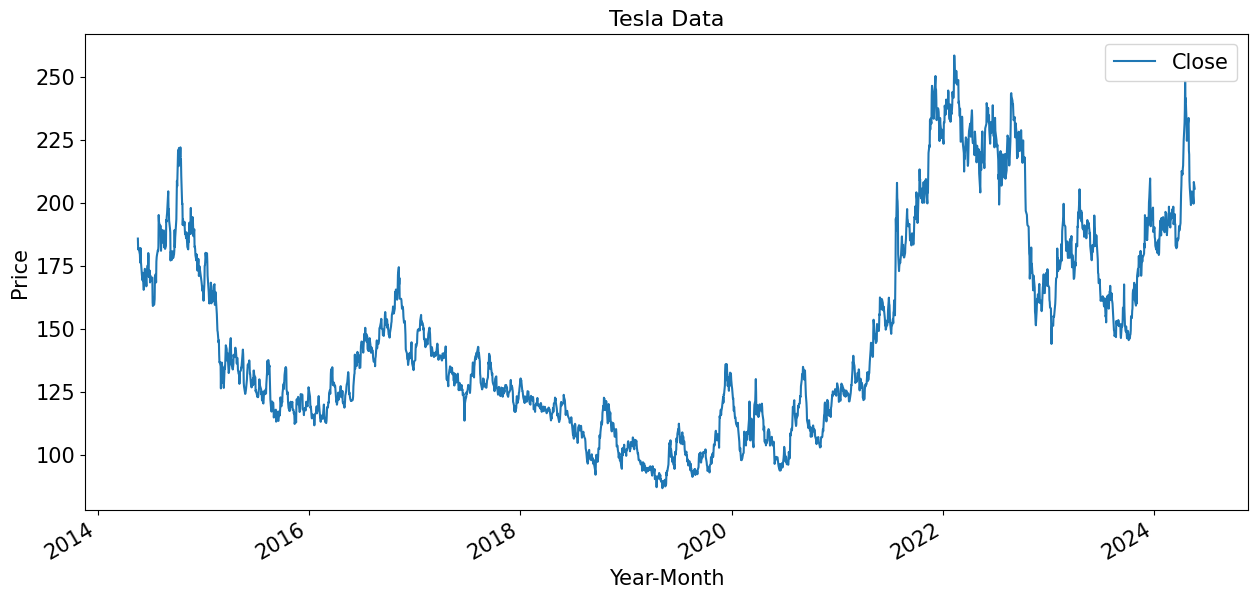

In [6]:
# Plot the close price
plt.figure(figsize=(15, 7))
forex_data['Close'].plot()

# Set the title and axis label
plt.title('Tesla Data', fontsize=16)
plt.xlabel('Year-Month', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(['Close'], prop={'size': 15})

# Show the plot
plt.show()

In [7]:
!pip install meteostat

In [8]:
from datetime import datetime
from meteostat import Point, Daily

In [9]:
today = datetime.today()
today

datetime.datetime(2024, 5, 20, 14, 57, 57, 418794)

Year

In [10]:
a = int(today.strftime("%Y"))
a

2024

month number

In [11]:
b = int(today.strftime("%m"))
b

5

day number

In [12]:
c = int(today.strftime("%d"))
c

20

In [13]:
period_int = int(period[:-1])

In [14]:
start = datetime(a-period_int,b,c)
end = datetime(a,b,c)

In [15]:
from meteostat import Stations

stations = Stations()
stations = stations.nearby(-19, -43)
station = stations.fetch(0)

print(station)

                                                    name country region  \
id                                                                        
86782                                Guanhaes / Guanhães      BR     MG   
83589                           Conceicao Do Mato Dentro      BR     MG   
86801                                  Timoteo / Timóteo      BR     MG   
83566                               Confis Intnl Airport      BR     MG   
83538                                         Diamantina      BR     MG   
...                                                  ...     ...    ...   
91233  Tinian Island, N. Mariana Is, West Tinian Airport      US     TI   
91217                               Guam, Mariana Island      US   <NA>   
RORK0                        Kitadaito Island / Nakanoku      JP   <NA>   
47945                                    Minamidaitojima      JP     ON   
47981                                            Iwojima      JP     TK   

         wmo  icao  lati

In [16]:
Brazil = Point(-19.6167 ,  -43.5667   ,   827.0)

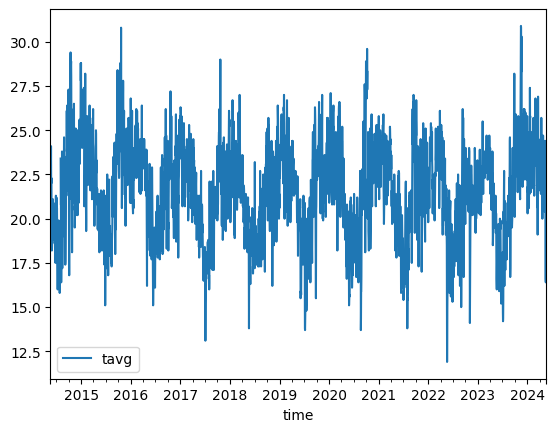

In [17]:
data = Daily(Brazil, start, end)
data = data.fetch()

# Plot line chart including average, minimum and maximum temperature
data.plot(y=['tavg'])
plt.show()

In [18]:
data[['tavg']]

,tavg
time,
2014-05-20,20.4
2014-05-21,19.8
2014-05-22,20.7
2014-05-23,22.1
2014-05-24,24.1
...,...
2024-05-16,20.8
2024-05-17,20.9
2024-05-18,20.5


In [19]:
data[['tavg']].isna().value_counts()

tavg 
False    3647
True        7
Name: count, dtype: int64

In [20]:
df_c = data[['tavg']].dropna()
df_c

,tavg
time,
2014-05-20,20.4
2014-05-21,19.8
2014-05-22,20.7
2014-05-23,22.1
2014-05-24,24.1
...,...
2024-05-16,20.8
2024-05-17,20.9
2024-05-18,20.5


In [21]:
def display(data, pred = None, vert = None, title = 'Prediction'):
  data = np.array(data).reshape((len(data), 1))
  plt.figure(figsize=(12, 6))
  plt.plot(data, label='Some periodic function')
  if pred != None:
    plt.plot(pred, label=title)
  if vert != None:
    plt.axvline(x=vert, c='r', linestyle='--')
  plt.legend()
  plt.grid()
  plt.show()

In [22]:
df1 = forex_data[['Close']].rename(columns={'Close': 'coffee'})

df = pd.merge(df1,df_c, how='inner', left_index=True, right_index=True)

df

,coffee,tavg
2014-05-20,185.699997,20.4
2014-05-21,181.399994,19.8
2014-05-22,181.350006,20.7
2014-05-23,181.899994,22.1
2014-05-27,179.350006,22.3
...,...,...
2024-05-14,202.850006,16.6
2024-05-15,201.250000,16.4
2024-05-16,199.550003,20.8
2024-05-17,208.149994,20.9


In [23]:
time_predict = 100

In [24]:
train_size = int(len(df)-time_predict)

train_data = df[:train_size].to_numpy()

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler1 = MinMaxScaler()
train_df = scaler1.fit_transform(train_data)


In [32]:
input_size = 2
hidden_size = 40
num_classes = 2


In [34]:
set_random_seed(42)
import warnings
warnings.filterwarnings('ignore')

# create data "ensemble"
def sliding_windows(data, seq_length):
    x = []
    y = []

    for i in range(len(data) - seq_length):
        _x = data[i:(i + seq_length)] # picking several sequential observations
        _y = data[i+seq_length] # picking the subsequent observation
        x.append(_x)
        y.append(_y)

    return torch.Tensor(np.array(x)), torch.Tensor(np.array(y))

# set length of the ensemble; accuracy of the predictions and
# speed perfomance almost always depend on it size
seq_length = 150 # compare 2 and 32
x, y = sliding_windows(train_df, seq_length)
print("Example of the obtained data:\n")
print("Data corresponding to the first x:")
print(x[0])
print("Data corresponding to the first y:")
print(y[0])


x_train = x
y_train = y




# Define new LSTM based model
class LSTMPredictor(nn.Module):

    def __init__(self, input_size, hidden_size, num_classes):
        # hidden_size == number of neurons
        super().__init__()
        self.lstm1 = nn.LSTM(input_size=input_size, hidden_size=hidden_size, batch_first=True, dropout=0.2)
        self.lstm2 = nn.LSTM(input_size=input_size, hidden_size=hidden_size//2, batch_first=True, dropout=0.2)
        self.lstm3 = nn.LSTM(input_size=input_size, hidden_size=hidden_size//4, batch_first=True, dropout=0.2)
        self.lstm4 = nn.LSTM(input_size=input_size, hidden_size=hidden_size//8, batch_first=True, dropout=0.2)
        self.fc_1 = nn.Linear(4*hidden_size, 64) # fully connected
        self.fc_11 = nn.Linear(64, 64)
        self.a = hidden_size + hidden_size//2 + hidden_size//4 + hidden_size//8
        self.fc_2 = nn.Linear(self.a, 1) # fully connected
        self.fc_3 = nn.Linear(self.a, 1) # fully connected
        self.fc_4 = nn.Linear(self.a, 1) # fully connected
        self.fc_5 = nn.Linear(self.a, 1) # fully connected
        self.relu = nn.Tanh()
        self.drop = nn.Dropout(p=0.2)

    def forward(self, x):
        out, (h1, c) = self.lstm1(x)
        out, (h2, c) = self.lstm2(x)
        out, (h3, c) = self.lstm3(x)
        out, (h4, c) = self.lstm4(x)

        out1 = torch.cat((h1, h2, h3, h4), 2)
        #out1 = self.drop(self.fc_11(self.drop(self.fc_1(self.relu(out)))))
        out2 = self.fc_2(self.relu(out1))
        out3 = self.fc_3(self.relu(out1))
        #out4 = self.fc_4(self.relu(out1))
        #out5 = self.fc_5(self.relu(out1))

        return torch.cat((out2, out3), 2)

lstm =  LSTMPredictor(input_size=input_size, hidden_size=hidden_size, num_classes=num_classes)


lstm.train()

print("LSTM training process with MSE loss:")

num_epochs = 2000
learning_rate = 0.001

criterion = torch.nn.L1Loss() # mean-squared error for regression
optimizer = torch.optim.AdamW(lstm.parameters(), lr=learning_rate)

 # Train the model
for epoch in range(num_epochs):
    y_pred = lstm(x_train)
    optimizer.zero_grad()
    #print(outputs.shape)
    loss = criterion(y_pred, y_train.unsqueeze(0))
    loss.backward()

    optimizer.step()
    if epoch % 200 == 0:
        print(f"Epoch: {epoch},".ljust(15), "loss: %1.5f" % (loss.item()))

Example of the obtained data:

Data corresponding to the first x:
tensor([[0.5769, 0.4474],
        [0.5518, 0.4158],
        [0.5515, 0.4632],
        [0.5547, 0.5368],
        [0.5399, 0.5474],
        [0.5213, 0.4421],
        [0.5550, 0.3368],
        [0.5291, 0.3316],
        [0.4991, 0.3895],
        [0.4921, 0.4158],
        [0.4866, 0.4211],
        [0.4805, 0.4632],
        [0.4977, 0.4474],
        [0.4584, 0.3632],
        [0.4601, 0.4737],
        [0.4948, 0.4263],
        [0.4968, 0.3789],
        [0.5070, 0.4000],
        [0.5026, 0.4368],
        [0.4799, 0.4105],
        [0.4665, 0.4263],
        [0.4680, 0.3737],
        [0.5044, 0.3526],
        [0.5151, 0.3053],
        [0.5096, 0.3211],
        [0.5434, 0.3421],
        [0.5367, 0.2947],
        [0.4881, 0.3632],
        [0.5029, 0.4474],
        [0.4755, 0.4263],
        [0.4916, 0.4579],
        [0.4819, 0.4895],
        [0.4796, 0.4579],
        [0.4866, 0.3947],
        [0.4866, 0.3789],
        [0.4287, 0.3842]

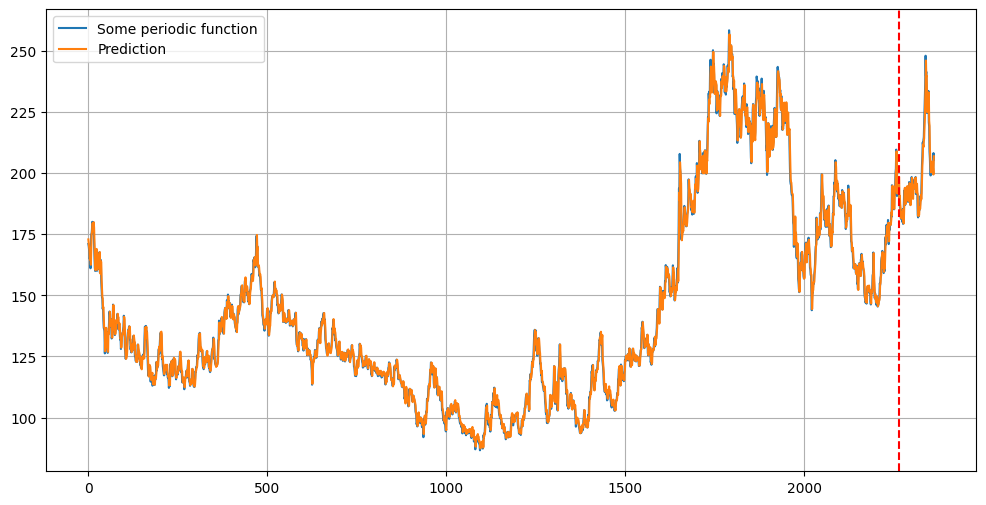

In [35]:
x_s, y_s = sliding_windows(scaler1.transform(df.to_numpy().reshape(-1,num_classes)), seq_length)

lstm.eval()

train_predict = lstm(x_s)
display(data=df[seq_length:len(df)].to_numpy().reshape(-1,num_classes)[:,0], pred=list(scaler1.inverse_transform(train_predict.detach().numpy().reshape(-1,num_classes)).reshape(-1,num_classes)[:,0]), vert=train_size-seq_length+1)

In [36]:
data_pred = scaler1.transform(df[:train_size].to_numpy().reshape(-1,num_classes))

x_s, y_s = sliding_windows(data_pred, seq_length)
for i in range(time_predict):
    data_pred = np.append(data_pred, (lstm(x_s).detach().numpy()[0][-1]).reshape(-1,num_classes),  axis=0)
    x_s, y_s = sliding_windows(data_pred, seq_length)
data_pred

array([[0.57687823, 0.44736842],
       [0.55183454, 0.41578947],
       [0.5515434 , 0.46315789],
       ...,
       [0.67103738, 0.4675822 ],
       [0.67113066, 0.46565163],
       [0.67121923, 0.46379322]])

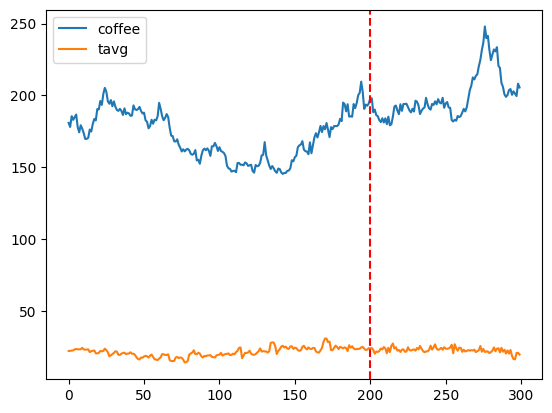

In [37]:
plt.plot(df.to_numpy()[-300:])
plt.legend(['coffee','tavg'], loc=2)
plt.axvline(x=300-time_predict, c='r', linestyle='--')

Predicted plot

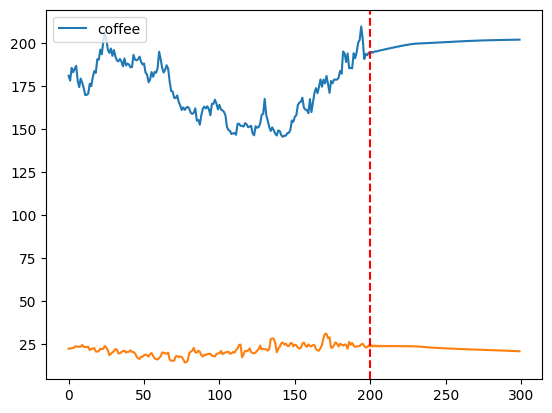

In [38]:
plt.plot(scaler1.inverse_transform(data_pred.reshape(-1,num_classes))[-300:])
plt.legend(['coffee'], loc=2)
plt.axvline(x=300-time_predict, c='r', linestyle='--')

In [39]:
train_size = int(len(df))

train_data = df[:train_size].to_numpy()
from sklearn.preprocessing import MinMaxScaler
scaler1 = MinMaxScaler()
train_df = scaler1.fit_transform(train_data)


set_random_seed(42)
import warnings
warnings.filterwarnings('ignore')

# create data "ensemble"
def sliding_windows(data, seq_length):
    x = []
    y = []

    for i in range(len(data) - seq_length):
        _x = data[i:(i + seq_length)] # picking several sequential observations
        _y = data[i+seq_length] # picking the subsequent observation
        x.append(_x)
        y.append(_y)

    return torch.Tensor(np.array(x)), torch.Tensor(np.array(y))

# set length of the ensemble; accuracy of the predictions and
# speed perfomance almost always depend on it size
seq_length = 150 # compare 2 and 32
x, y = sliding_windows(train_df, seq_length)
print("Example of the obtained data:\n")
print("Data corresponding to the first x:")
print(x[0])
print("Data corresponding to the first y:")
print(y[0])


x_train = x
y_train = y




# Define new LSTM based model
class LSTMPredictor(nn.Module):

    def __init__(self, input_size, hidden_size, num_classes):
        # hidden_size == number of neurons
        super().__init__()
        self.lstm1 = nn.LSTM(input_size=input_size, hidden_size=hidden_size, batch_first=True, dropout=0.2)
        self.lstm2 = nn.LSTM(input_size=input_size, hidden_size=hidden_size//2, batch_first=True, dropout=0.2)
        self.lstm3 = nn.LSTM(input_size=input_size, hidden_size=hidden_size//4, batch_first=True, dropout=0.2)
        self.lstm4 = nn.LSTM(input_size=input_size, hidden_size=hidden_size//8, batch_first=True, dropout=0.2)
        self.fc_1 = nn.Linear(4*hidden_size, 64) # fully connected
        self.fc_11 = nn.Linear(64, 64)
        self.a = hidden_size + hidden_size//2 + hidden_size//4 + hidden_size//8
        self.fc_2 = nn.Linear(self.a, 1) # fully connected
        self.fc_3 = nn.Linear(self.a, 1) # fully connected
        self.fc_4 = nn.Linear(self.a, 1) # fully connected
        self.fc_5 = nn.Linear(self.a, 1) # fully connected
        self.relu = nn.Tanh()
        self.drop = nn.Dropout(p=0.2)

    def forward(self, x):
        out, (h1, c) = self.lstm1(x)
        out, (h2, c) = self.lstm2(x)
        out, (h3, c) = self.lstm3(x)
        out, (h4, c) = self.lstm4(x)

        out1 = torch.cat((h1, h2, h3, h4), 2)
        #out1 = self.drop(self.fc_11(self.drop(self.fc_1(self.relu(out)))))
        out2 = self.fc_2(self.relu(out1))
        out3 = self.fc_3(self.relu(out1))
        #out4 = self.fc_4(self.relu(out1))
        #out5 = self.fc_5(self.relu(out1))

        return torch.cat((out2, out3), 2)

lstm =  LSTMPredictor(input_size=input_size, hidden_size=hidden_size, num_classes=num_classes)

lstm.train()

print("LSTM training process with MSE loss:")

num_epochs = 2000
learning_rate = 0.001

criterion = torch.nn.L1Loss() # mean-squared error for regression
optimizer = torch.optim.AdamW(lstm.parameters(), lr=learning_rate)

 # Train the model
for epoch in range(num_epochs):
    y_pred = lstm(x_train)
    optimizer.zero_grad()
    #print(outputs.shape)
    loss = criterion(y_pred, y_train.unsqueeze(0))
    loss.backward()

    optimizer.step()
    if epoch % 200 == 0:
        print(f"Epoch: {epoch},".ljust(15), "loss: %1.5f" % (loss.item()))

Example of the obtained data:

Data corresponding to the first x:
tensor([[0.5769, 0.4474],
        [0.5518, 0.4158],
        [0.5515, 0.4632],
        [0.5547, 0.5368],
        [0.5399, 0.5474],
        [0.5213, 0.4421],
        [0.5550, 0.3368],
        [0.5291, 0.3316],
        [0.4991, 0.3895],
        [0.4921, 0.4158],
        [0.4866, 0.4211],
        [0.4805, 0.4632],
        [0.4977, 0.4474],
        [0.4584, 0.3632],
        [0.4601, 0.4737],
        [0.4948, 0.4263],
        [0.4968, 0.3789],
        [0.5070, 0.4000],
        [0.5026, 0.4368],
        [0.4799, 0.4105],
        [0.4665, 0.4263],
        [0.4680, 0.3737],
        [0.5044, 0.3526],
        [0.5151, 0.3053],
        [0.5096, 0.3211],
        [0.5434, 0.3421],
        [0.5367, 0.2947],
        [0.4881, 0.3632],
        [0.5029, 0.4474],
        [0.4755, 0.4263],
        [0.4916, 0.4579],
        [0.4819, 0.4895],
        [0.4796, 0.4579],
        [0.4866, 0.3947],
        [0.4866, 0.3789],
        [0.4287, 0.3842]

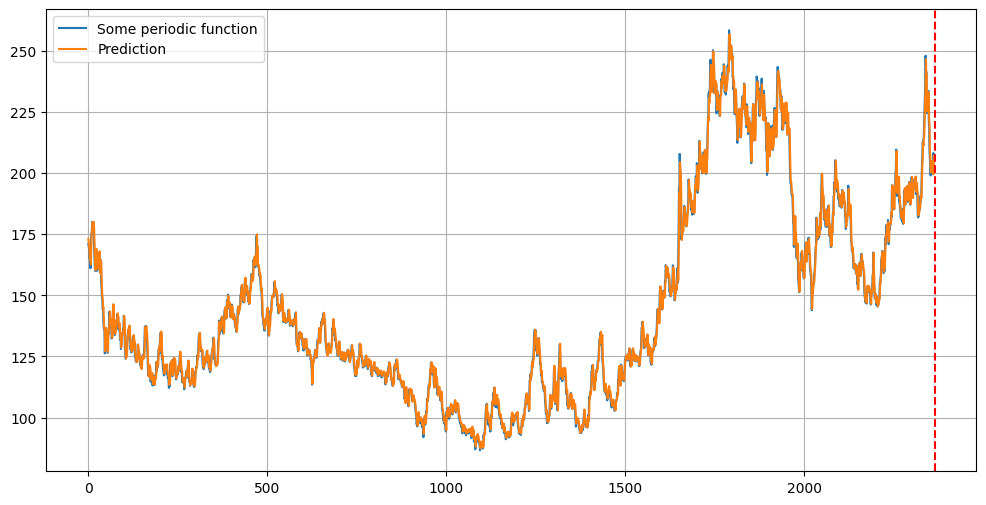

In [40]:
x_s, y_s = sliding_windows(scaler1.transform(df.to_numpy().reshape(-1,num_classes)), seq_length)

lstm.eval()

train_predict = lstm(x_s)
display(data=df[seq_length:len(df)].to_numpy().reshape(-1,num_classes)[:,0], pred=list(scaler1.inverse_transform(train_predict.detach().numpy().reshape(-1,num_classes)).reshape(-1,num_classes)[:,0]), vert=train_size-seq_length+1)

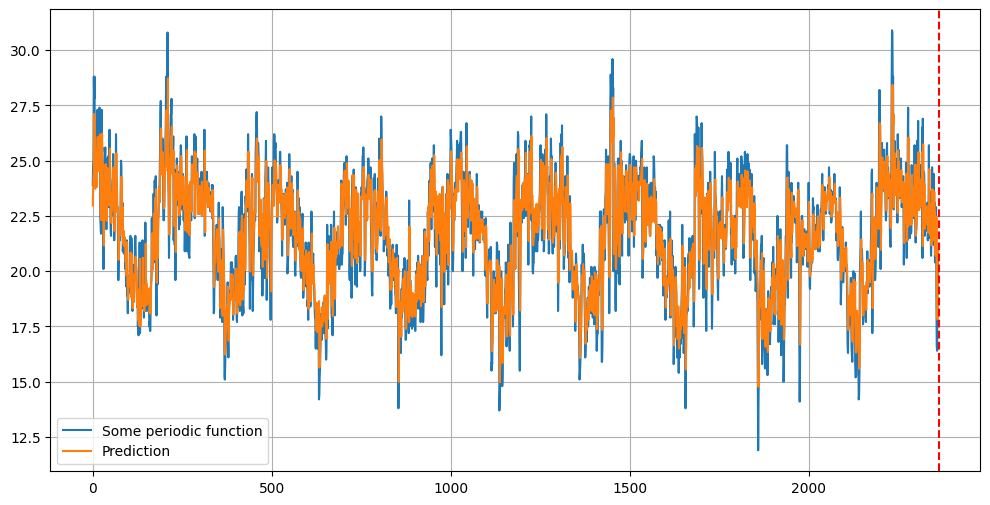

In [41]:
x_s, y_s = sliding_windows(scaler1.transform(df.to_numpy().reshape(-1,num_classes)), seq_length)

lstm.eval()

train_predict = lstm(x_s)
display(data=df[seq_length:len(df)].to_numpy().reshape(-1,num_classes)[:,1], pred=list(scaler1.inverse_transform(train_predict.detach().numpy().reshape(-1,num_classes)).reshape(-1,num_classes)[:,1]), vert=train_size-seq_length+1)

In [42]:
data_pred = scaler1.transform(df[:-1*time_predict].to_numpy().reshape(-1,num_classes))

x_s, y_s = sliding_windows(data_pred, seq_length)
for i in range(time_predict):
    data_pred = np.append(data_pred, (lstm(x_s).detach().numpy()[0][-1]).reshape(-1,num_classes),  axis=0)
    x_s, y_s = sliding_windows(data_pred, seq_length)
data_pred

array([[0.57687823, 0.44736842],
       [0.55183454, 0.41578947],
       [0.5515434 , 0.46315789],
       ...,
       [0.71854717, 0.44704241],
       [0.7188375 , 0.44621941],
       [0.71911687, 0.44553632]])

In [43]:
pd.DataFrame(scaler1.inverse_transform(data_pred.reshape(-1,num_classes))[-1*time_predict :-1])

,0,1
0,193.707040,23.244084
1,194.807945,24.033271
2,194.374274,23.335096
3,195.060769,23.857550
4,194.915393,23.344303
...,...,...
94,209.860695,20.454396
95,209.917883,20.431908
96,209.972533,20.411876
97,210.024553,20.393806


In [44]:
data_pred = scaler1.transform(df.to_numpy().reshape(-1,num_classes))

x_s, y_s = sliding_windows(data_pred, seq_length)
for i in range(time_predict):
    data_pred = np.append(data_pred, (lstm(x_s).detach().numpy()[0][-1]).reshape(-1,num_classes),  axis=0)
    x_s, y_s = sliding_windows(data_pred, seq_length)
data_pred

array([[0.57687823, 0.44736842],
       [0.55183454, 0.41578947],
       [0.5515434 , 0.46315789],
       ...,
       [0.72827119, 0.58091754],
       [0.72915876, 0.58081305],
       [0.73004478, 0.58062375]])

In [45]:
pd.DataFrame(scaler1.inverse_transform(data_pred.reshape(-1,num_classes))[-1*time_predict:-1])

,0,1
0,206.998877,20.908151
1,206.203389,19.943760
2,207.028106,20.732168
3,206.296991,20.091489
4,206.895799,20.638659
...,...,...
94,211.234778,22.933437
95,211.388280,22.936500
96,211.541372,22.937836
97,211.694168,22.937433


In [46]:
df_pred = scaler1.inverse_transform(data_pred.reshape(-1,num_classes))
df_pred

array([[185.69999695,  20.4       ],
       [181.3999939 ,  19.8       ],
       [181.3500061 ,  20.7       ],
       ...,
       [211.69416756,  22.93743321],
       [211.8465638 ,  22.93544796],
       [211.99869396,  22.93185117]])

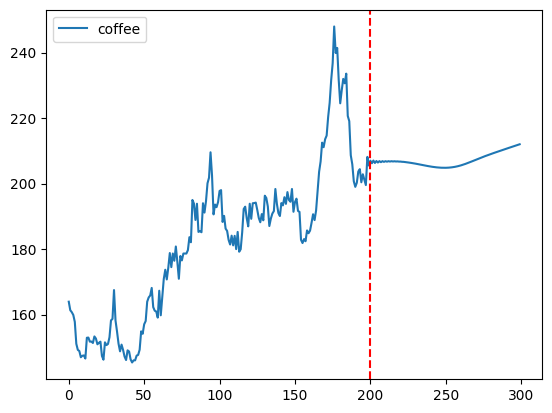

In [47]:
plt.plot(df_pred[-300:,0])
plt.legend(['coffee'], loc=2)
plt.axvline(x=300-time_predict, c='r', linestyle='--')

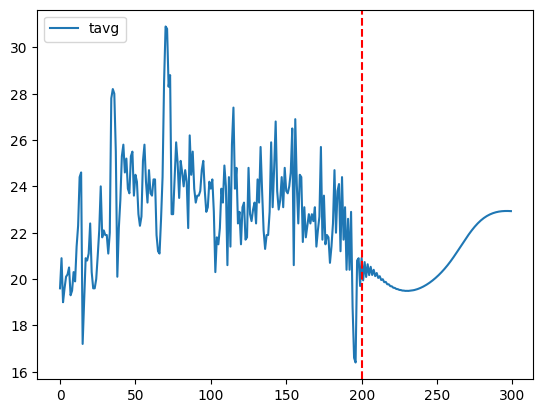

In [48]:
plt.plot(df_pred[-300:,1])
plt.legend(['tavg'], loc=2)
plt.axvline(x=300-time_predict, c='r', linestyle='--')